# Exercise 8
***

## 1.

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

In [98]:
def func(x):
        return (4-2.1*x[0]**2 + x[0] ** 4 / 3 )* x[0] ** 2 + x[0] * x[1] + (4*x[1]**2-4)*x[1]**2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)

x2 = np.array([x, y])

/var/folders/0c/s31t6sbs7x92vc54xc4x32n40000gn/T/ipykernel_14568/537386096.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


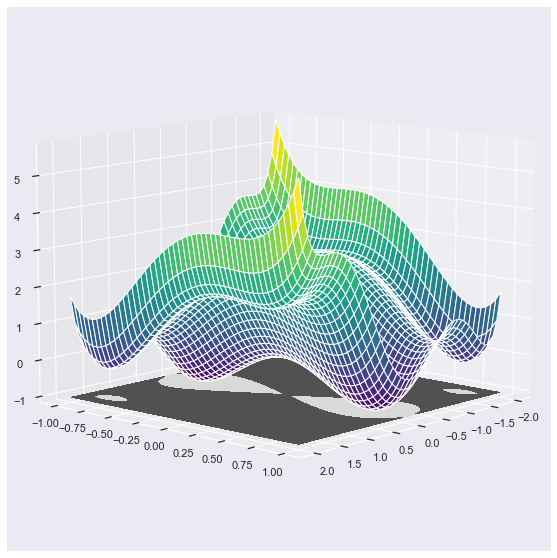

In [101]:
import pylab
from mpl_toolkits.mplot3d import Axes3D

x1, y1 = np.meshgrid(x, y)
z = func(np.array([x1, y1]))

fig = plt.figure(figsize=(10, 10))
color = plt.get_cmap('viridis')
ax = fig.gca(projection='3d')
grid = ax.plot_surface(x1, y1, z, cmap=color)
ax.view_init(10, 42)
cset = ax.contourf(x1, y1, z, zdir='z', offset=np.min(z),levels=0, cmap=plt.get_cmap('Greys'))
plt.show()


In [39]:
sol = sp.optimize.minimize(func, x0 =[np.random.uniform(-2, 2, 100), np.random.uniform(-1, 1, 100)])
print(len(sol.x))

200


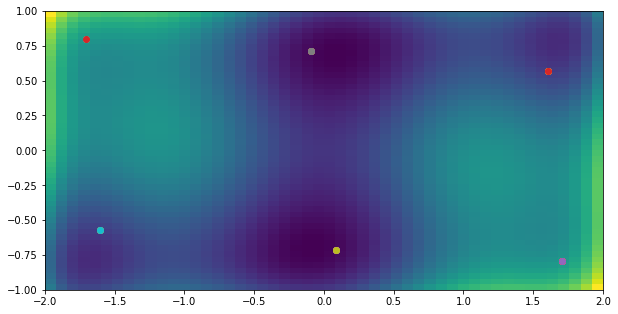

In [40]:
val = np.array
plt.figure(figsize=(10, 10))
plt.imshow(func([x1, y1]), extent=[-2, 2, -1, 1])
for i in range(1000):
    x = np.random.uniform(-2, 2)
    y = np.random.uniform(-1, 1)
    sol = sp.optimize.minimize(func, x0 =[x, y])
    plt.scatter(sol.x[0], sol.x[1])
    val = np.append(val, sol.fun)
plt.show()

From the plot above we can see that the function has 6 minima in the given range of x and y. 
The value of the function is in the list val. The function seems to be symmetric because the the values of the minima is the same 
2 points.

In [41]:
val = [ "{:0.2f}".format(x) for x in val[1:]]

In [42]:
val = np.unique(val)
val

array(['-0.22', '-1.03', '2.10'], dtype='<U5')

In [43]:
sol = sp.optimize.minimize(func, x0 =[0, 0])
sol.x

array([0., 0.])

At the (0,0) the function also have the value 0.

For the initial values (0,0) we stay at the point 0. Probably beacuse it is a saddle point.

## 2.

/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


array([  -1.39717244,    6.16452595, -184.38792774,  -61.32093734])

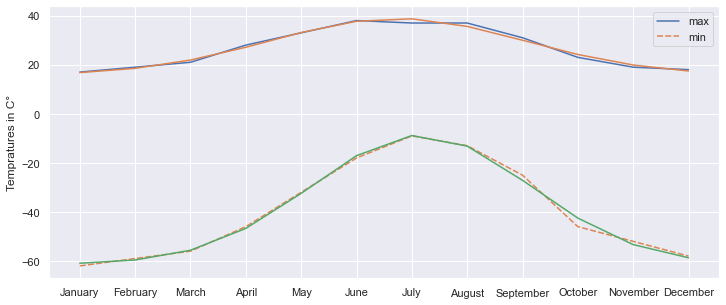

In [49]:
max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

temp = pd.DataFrame(index=pd.date_range('2018-01-01','2018-12-31',freq='M').month_name())
temp['max'] = max
temp['min'] = min

alist = np.arange(0, 12)

def func1(x, std1, m1, s1, n1):
    return s1/(np.sqrt(2 * np.pi) * std1) * np.exp(-(alist - m1)**2/(2*std1)**2) + n1

def func2 (x, std2, m2, s2, n2):
    return s2/(np.sqrt(2 * np.pi) * std2) * np.exp(-(alist - m2)**2/(2*std2)**2) + n2

# gaussian with some parameters to fit the temperatures

para_max = sp.optimize.curve_fit(func1, alist ,temp['max'])
para_min = sp.optimize.curve_fit(func2, alist ,temp['min'])

fig = plt.subplots(figsize=(12, 5))
sns.lineplot(data=temp)
sns.lineplot(alist, func1(alist, para_max[0][0], para_max[0][1], para_max[0][2], para_max[0][3]))
sns.lineplot(alist, func2(alist, para_min[0][0], para_min[0][1], para_min[0][2], para_min[0][3]))
plt.ylabel('Tempratures in C°')




para_min[0]

Fit looks really good.

## 3.

In [147]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P /Users/max/data/

--2021-12-15 15:26:52--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com... 162.125.69.18
Connecting to www.dropbox.com|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2021-12-15 15:26:52--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc277974ec0a93ca20a3fd35707a.dl.dropboxusercontent.com/cd/0/inline/Bb6kcZL9cQplixn65AjTNBU8W0TzxlIcWN0Gie1HUIsjYfOtrdBcAAMHcA7K3oVOfh1ftV8nXeYBfyE_cG7C0OAhEdNdF1Gy0W342JEgxlKdzSlnvELqOyBiEvuM-nXmojLUODNrI8kPqxpGD0uDwiBt/file# [following]
--2021-12-15 15:26:52--  https://uc277974ec0a93ca20a3fd35707a.dl.dropboxusercontent.com/cd/0/inline/Bb6kcZL9cQplixn65AjTNBU8W0TzxlIcWN0Gie1HUIsjYfOtrdBcAAMHcA7K3oVOfh1ftV8nXeYBfyE_cG7C0OAhEdNdF1Gy0W342JEgxlKdzSlnvELqOyBiEvuM-nXmojLUODNrI

In [148]:
data = pd.read_pickle("/Users/max/data/residuals_261.pkl")

In [149]:
data

array({'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])},
      dtype=object)

## 4.

In [152]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P /Users/max/data/

--2021-12-15 15:29:56--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com... 162.125.69.18
Connecting to www.dropbox.com|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2021-12-15 15:29:56--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc209950f95f1c4229d01399d0cb.dl.dropboxusercontent.com/cd/0/inline/Bb4Sv7U_RGlqObGuJqoMppjVRsBcVoMiqq0LswX8bEFkIXBfHYcXQyHD3AuWuTqD4GYwgv-M2mKbVQx_fn-DsWOfhirZTzT0ql6Z53Fq2gCigzKmv7vqUkopm2gHR4DpnOucFQAuoRGE4vsZtxdaU6k2/file# [following]
--2021-12-15 15:29:57--  https://uc209950f95f1c4229d01399d0cb.dl.dropboxusercontent.com/cd/0/inline/Bb4Sv7U_RGlqObGuJqoMppjVRsBcVoMiqq0LswX8bEFkIXBfHYcXQ

In [198]:
data = np.loadtxt('/Users/max/data/munich_temperatures_average_with_bad_data.txt')

In [199]:
data = pd.DataFrame(data, columns=['year', 'temp'])
x = np.array(data['year'])

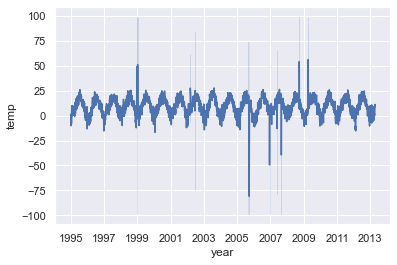

In [205]:
sns.lineplot(x=data['year'], y=data['temp'])
plt.xticks(np.arange(1995, 2014, 2))
plt.show()

In [264]:
def func(t,a,b,c):
    return a * np.cos(2 * np.pi * t + b) + c

mask = ((2008 <= data['year'] <= 2009) | (2012 <= data['year'] <= 2013))
start_end = data['year'][mask] 

params, z = sp.optimize.curve_fit(func, data['year'], data['temp'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

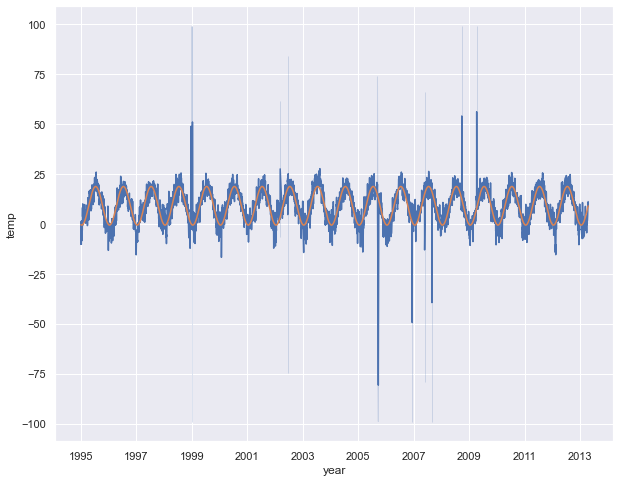

In [216]:
fig = plt.figure(figsize=(10, 8))
sns.lineplot(x=data['year'], y=data['temp'])
sns.lineplot(x=data['year'], y=func(data['year'], params[0], params[1], params[2]))
plt.xticks(np.arange(1995, 2014, 2))
plt.show()

In [250]:
start_end

Series([], Name: year, dtype: float64)

In [259]:
data['year'][4720:4750]

4720    2007.92539
4721    2007.92813
4722    2007.93087
4723    2007.93361
4724    2007.93634
4725    2007.93908
4726    2007.94182
4727    2007.94456
4728    2007.94730
4729    2007.95003
4730    2007.95277
4731    2007.95551
4732    2007.95825
4733    2007.96099
4734    2007.96372
4735    2007.96646
4736    2007.96920
4737    2007.97194
4738    2007.97467
4739    2007.97741
4740    2007.98015
4741    2007.98289
4742    2007.98563
4743    2007.98836
4744    2007.99110
4745    2007.99384
4746    2007.99658
4747    2007.99932
4748    2008.00274
4749    2008.00548
Name: year, dtype: float64